In [1]:
%matplotlib ipympl
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
import seaborn

seaborn.set(context="notebook", style="darkgrid")
plt.rcParams["figure.figsize"] = (8, 6)
from tqdm.auto import tqdm, trange

from ssptools import evolve_mf_3 as emf3
from limepy import limepy

import numpy as np
import scipy as sp
import astropy.units as u
import astropy.constants as const

from binaryshift import BinaryShift

In [2]:
m123 = [0.1, 0.5, 1.0, 100]  # Slope breakpoints for initial mass function
a12 = [-0.468, -1.178, -2.117]  # Slopes for initial mass function
nbin12 = [5, 5, 20]

# Output times for the evolution
tout = np.array([11000])

# Integration settings
N0 = 5e5  # Normalization of stars
Ndot = -0.0001  # Regulates how low mass objects are depleted default -20, 0 for 47 Tuc
tcc = 0  # Core collapse time
NS_ret = 0.1  # Initial neutron star retention
BH_ret_int = 1  # Initial Black Hole retention
BH_ret_dyn = 0.00235  # Dynamical Black Hole retention
FeHe = -0.7  # Metallicity

In [3]:
f = emf3.evolve_mf(
    m123=m123,
    a12=a12,
    nbin12=nbin12,
    tout=tout,
    N0=N0,
    Ndot=Ndot,
    tcc=tcc,
    NS_ret=NS_ret,
    BH_ret_int=BH_ret_int,
    BH_ret_dyn=BH_ret_dyn,
    FeHe=FeHe,
    natal_kicks=True,
    vesc=100,
)

/home/peter/research/ssptools/ssptools/evolve_mf_3.py:321: RuntimeWarning: divide by zero encountered in true_divide
  As = Ns / P1
/home/peter/research/ssptools/ssptools/evolve_mf_3.py:246: RuntimeWarning: divide by zero encountered in double_scalars
  Aj = Nj / self.Pk(alphaj, 1, m1, mto)


In [4]:
f

In [5]:
cs = f.Ns[-1] > 10 * f.Nmin
cr = f.Nr[-1] > 10 * f.Nmin
mj = np.r_[f.ms[-1][cs], f.mr[-1][cr]]
Mj = np.r_[f.Ms[-1][cs], f.Mr[-1][cr]]
dms = f.mes[-1][1:] - f.mes[-1][0:-1]
nms = len(f.ms[-1][cs])

In [6]:
f.Nmin

0.1

In [7]:
bs = BinaryShift(mj=mj, Mj=Mj, MF=f, verbose=False)

In [8]:
bs.dump()

self.mj = array([0.11851084, 0.16351292, 0.22560363, 0.31127202, 0.42947124,
       0.53616312, 0.6158897 , 0.70747148, 0.80754321, 0.6158897 ,
       0.70747148, 0.80754321, 0.92779583, 1.11896564, 1.40869427,
       2.81071458, 3.53848001, 4.45468241, 5.60811288, 7.06019582,
       8.88825993])
self.Mj = array([3.50653839e+03, 5.74173527e+03, 9.40172964e+03, 1.53947409e+04,
       2.52079221e+04, 1.45666174e+04, 1.63248118e+04, 1.82952210e+04,
       1.85600328e+04, 4.28216163e+04, 3.68811585e+04, 8.56110667e+03,
       8.87107346e+03, 2.04048921e+04, 2.87933957e+03, 3.38905042e+00,
       6.98416820e+00, 1.30644215e+01, 2.60412400e+01, 5.68695470e+01,
       4.17703060e+01])
self._nms = 8
self._mWD_max = 1.2485309234871975
self._mBH_min = 2.51188643150958


In [9]:
bs.MS_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [10]:
bs.mj[bs.MS_mask]

array([0.11851084, 0.16351292, 0.22560363, 0.31127202, 0.42947124,
       0.53616312, 0.6158897 , 0.70747148, 0.80754321])

In [11]:
mj_new, Mj_new = bs.shift_flat(fb=0.3)
# mj_new, Mj_new = bs.shift_equal(fb=0.25)
# mj_new, Mj_new = bs.shift_solar(fb=0.25)

In [12]:
bs._q_min

0.1467547966832377

Text(0.5, 0, 'mj [$M_\\odot$]')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
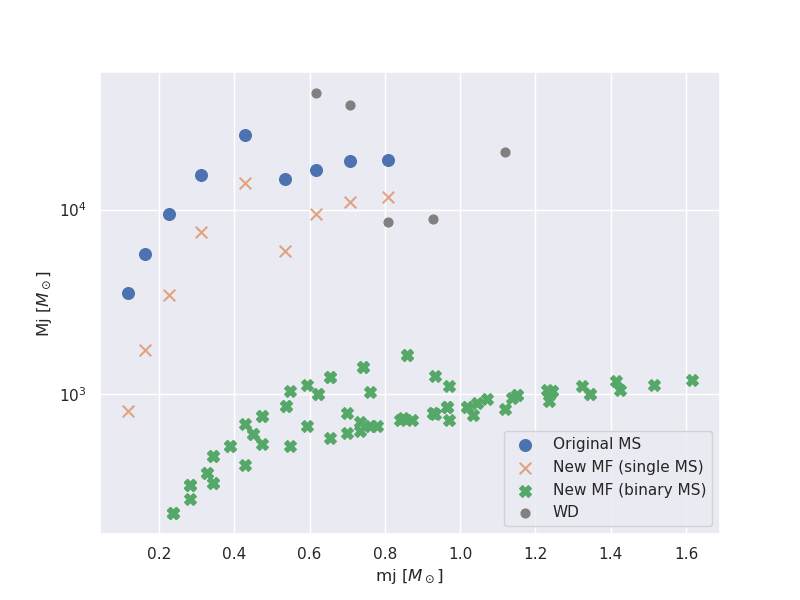

In [13]:
plt.figure()
plt.scatter(mj[bs.MS_mask], Mj[bs.MS_mask], label="Original MS", s=70)

# plt.scatter(mj, Mj, label="Original MF", s=70)

plt.yscale("log")
# plt.ylim(1e2, 1e5)
plt.scatter(
    mj_new[bs.MS_mask_new],
    Mj_new[bs.MS_mask_new],
    label="New MF (single MS)",
    marker="x",
    s=70,
    alpha=0.7,
)
plt.scatter(
    mj_new[bs.bin_mask],
    Mj_new[bs.bin_mask],
    label="New MF (binary MS)",
    marker="X",
    s=70,
)
plt.scatter(
    mj_new[bs.WD_mask_new],
    Mj_new[bs.WD_mask_new],
    label="WD",
    marker="o",
    color="grey",
    s=40,
)

plt.legend()
plt.ylabel(r"Mj [$M_\odot$]")
plt.xlabel(r"mj [$M_\odot$]")
# plt.savefig("shifted.png",dpi=300)
# plt.xlim(0, 1.7)

In [14]:
mj

array([0.11851084, 0.16351292, 0.22560363, 0.31127202, 0.42947124,
       0.53616312, 0.6158897 , 0.70747148, 0.80754321, 0.6158897 ,
       0.70747148, 0.80754321, 0.92779583, 1.11896564, 1.40869427,
       2.81071458, 3.53848001, 4.45468241, 5.60811288, 7.06019582,
       8.88825993])

In [15]:
# Mass ratio
np.sum(Mj_new[bs.bin_mask]) / np.sum(Mj_new[bs.MS_mask_new])

0.9381975141828359

In [16]:
# check mass conservation
print(f"{np.sum(Mj) = :.3f}, {np.sum(Mj_new) = :.3f}")

np.sum(Mj) = 247566.655, np.sum(Mj_new) = 247566.655


In [17]:
# Have a look at Nj

In [18]:
Nj = Mj_new / mj_new

In [19]:
Nj[bs.bin_mask]

array([ 954.4624116 , 1132.73780344,  876.39538314,  855.03432581,
        834.1939368 ,  741.39777192,  954.4624116 , 1132.73780344,
       1344.3117261 , 1893.39520602,  876.39538314,  855.03432581,
        834.1939368 ,  741.39777192,  954.4624116 , 1132.73780344,
       1344.3117261 , 1595.40375978, 1893.39520602,  876.39538314,
        855.03432581,  834.1939368 ,  741.39777192,  954.4624116 ,
       1132.73780344, 1344.3117261 , 1595.40375978, 1893.39520602,
        876.39538314,  855.03432581,  834.1939368 ,  741.39777192,
        954.4624116 , 1132.73780344, 1344.3117261 , 1595.40375978,
       1893.39520602,  876.39538314,  855.03432581,  834.1939368 ,
        741.39777192,  954.4624116 , 1132.73780344, 1344.3117261 ,
       1595.40375978, 1893.39520602,  876.39538314,  855.03432581,
        834.1939368 ,  741.39777192,  954.4624116 , 1132.73780344,
       1344.3117261 , 1595.40375978, 1893.39520602,  876.39538314,
        855.03432581,  834.1939368 ,  741.39777192,  954.46241

In [20]:
Nj[bs.MS_mask_new]

array([ 6827.72028321, 10620.44606174, 15160.60669254, 24228.64240777,
       32614.28692748, 11066.00144734, 15425.66672171, 15432.36317476,
       14436.6154068 ])

In [21]:
# This is the bad (old) definition
np.sum(Nj[bs.bin_mask]) / np.sum(Nj[bs.MS_mask_new])

0.5871757569546835

In [22]:
# This is the definition we want to use
print(f"Binary Fraction: {bs.fb_true * 100:.3f}")

Binary Fraction: 36.995


In [48]:
print(f"Input fb | True fb | Diff")
print("---------------------------")
for fb in np.linspace(0, 0.39, 40):
    bs.shift_flat(fb=fb)
    # bs.shift_solar(fb=fb)
    # bs.shift_q(fb=[0.015,0.015],q=[1,1])

    print(f"{fb*100:.1f}    | {bs.fb_true*100:.2f}   | {-1*(fb - bs.fb_true)*100:.2f}")

Input fb | True fb | Diff
---------------------------
0.0    | 0.00   | -0.00
1.0    | 0.94   | -0.06
2.0    | 1.89   | -0.11
3.0    | 2.86   | -0.14
4.0    | 3.85   | -0.15
5.0    | 4.85   | -0.15
6.0    | 5.87   | -0.13
7.0    | 6.91   | -0.09
8.0    | 7.96   | -0.04
9.0    | 9.04   | 0.04
10.0    | 10.13   | 0.13
11.0    | 11.24   | 0.24
12.0    | 12.38   | 0.38
13.0    | 13.53   | 0.53
14.0    | 14.71   | 0.71
15.0    | 15.91   | 0.91
16.0    | 17.13   | 1.13
17.0    | 18.37   | 1.37
18.0    | 19.64   | 1.64
19.0    | 20.93   | 1.93
20.0    | 22.25   | 2.25
21.0    | 23.59   | 2.59
22.0    | 24.96   | 2.96
23.0    | 26.36   | 3.36
24.0    | 27.79   | 3.79
25.0    | 29.24   | 4.24
26.0    | 30.73   | 4.73
27.0    | 32.25   | 5.25
28.0    | 33.79   | 5.79
29.0    | 35.38   | 6.38
30.0    | 37.00   | 7.00
31.0    | 38.65   | 7.65
32.0    | 40.34   | 8.34
33.0    | 42.06   | 9.06
34.0    | 43.83   | 9.83
35.0    | 45.64   | 10.64
36.0    | 47.49   | 11.49
37.0    | 49.38   | 12.38
38.0

In [49]:
fbs = np.linspace(0, 0.39, 40)

true_fbs = []

for fb in fbs:
    bs.shift_flat(fb=fb)
    true_fbs.append(bs.fb_true)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
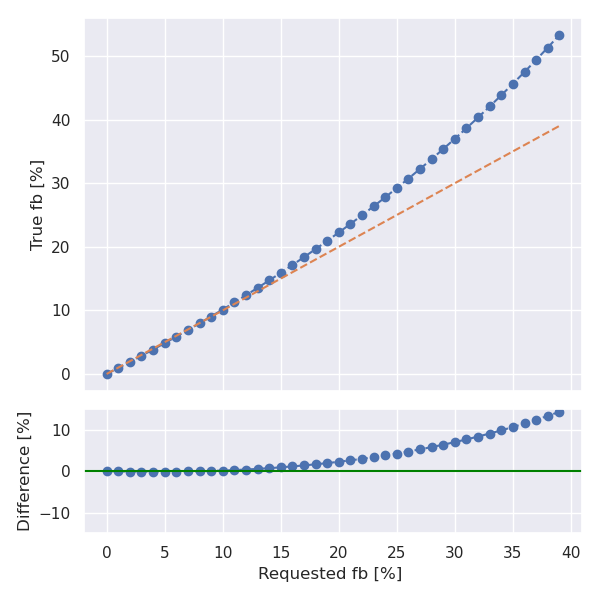

In [52]:
fig, axes = plt.subplots(
    2, 1, figsize=(6, 6), sharex=True, gridspec_kw={"height_ratios": [3, 1]}
)
axes[0].plot(np.array(fbs) * 100, np.array(true_fbs) * 100, "o--")
axes[1].set_xlabel("Requested fb [%] ")
axes[0].set_ylabel("True fb [%]")
axes[1].plot(np.array(fbs) * 100, np.array(true_fbs - fbs) * 100, "o--")
axes[0].plot(np.array(fbs) * 100, np.array(fbs) * 100, "--")

axes[1].set_ylabel("Difference [%]")
axes[1].set_ylim(-15, 15)
axes[1].axhline(0, color="green")
fig.tight_layout()

In [26]:
# Have a look at models
stop

NameError: name 'stop' is not defined

In [ ]:
l = limepy(
    M=1e6, phi0=6, g=0.8, mj=mj, Mj=Mj, delta=0.45, rh=8, ra=10 ** 1.23, project=True
)

In [ ]:
l_bin = limepy(
    M=1e6,
    phi0=6,
    g=0.8,
    mj=mj_new,
    Mj=Mj_new,
    delta=0.45,
    rh=8,
    ra=10 ** 1.23,
    project=True,
)

In [ ]:
plt.figure()
plt.loglog()
plt.xlim(1e-2, 1e2)
plt.ylim(1e2, 1e7)
plt.plot(l.r, l.mcp, label="No Binaries")
plt.xlabel("R [pc]")
plt.ylabel("Enclosed Mass")
plt.plot(l_bin.r, l_bin.mcp, label="Binaries")
plt.legend()

In [ ]:
plt.figure()
plt.xscale("log")
plt.xlim(1e-2, 1e2)
plt.plot(l.r, np.sqrt(l.v2R), label="No Binaries")
plt.xlabel("R [pc]")
plt.ylabel("Vr")
plt.plot(l_bin.r, np.sqrt(l_bin.v2R), label="Binaries")
plt.legend()

In [ ]:
plt.figure()
plt.xscale("log")
plt.xlim(1e-2, 1e2)
plt.plot(l.r, np.sqrt(l.v2T), label="No Binaries")
plt.xlabel("R [pc]")
plt.ylabel("Vt")
plt.plot(l_bin.r, np.sqrt(l_bin.v2T), label="Binaries")
plt.legend()

In [ ]:
plt.figure()
plt.xscale("log")
plt.xlim(1e-2, 1e2)
plt.plot(l.r, np.sqrt(l.v2p), label="No Binaries")
plt.xlabel("R [pc]")
plt.ylabel("Vlos")
plt.plot(l_bin.r, np.sqrt(l_bin.v2p), label="Binaries")
plt.legend()

In [ ]:
plt.figure()
plt.loglog()
plt.xlim(1e-1, 1e2)
plt.ylim(1e-0, 1e6)
plt.plot(l.r, l.Sigma, label="No Binaries")
plt.xlabel("R [pc]")
plt.ylabel(r"$\Sigma$")
plt.plot(l_bin.r, l_bin.Sigma, label="Binaries")
plt.legend()